### 1) Import libraries and define DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_file = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
test_file = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [3]:
# Concatenate the train and test sets for the cleaning step
SalePrice_column = df_train['SalePrice']
df_in = pd.concat((df_train, df_test))

In [4]:
df_in.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_in.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 2) Cleaning the data

In [6]:
# Dropping the feature SalePrice since it is not given for the test set
df = df_in.drop('SalePrice', axis=1)
# Dropping the rows with only NaNs
df = df.dropna(thresh=2)
# Dropping the columns with a high number of NaNs
df = df.drop(['Alley', 'FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [7]:
# Percentage of null values in the dataframe
Pct_null = (df.isnull().sum()/df.shape[0])*100

In [8]:
# Remove columns with more than 30% of null values
col_null = Pct_null[Pct_null > 30].keys()
df = df.drop(col_null, axis=1)

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 75, dtype: int64

In [11]:
# Replace the nan value in MSZoning by the recurrent value
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
# Replace the nan value in Utilities by the recurrent value
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
# Replace the nan values in LotFrontage by the mean value
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True)
# Replace the nan values in MasVnr by ['None', 0]
df[['MasVnrType', 'MasVnrArea']] = df[['MasVnrType', 'MasVnrArea']].apply(
        lambda x: ["None", 0] if pd.isnull(x['MasVnrType'])
        else x, axis=1)
df['BsmtQual'].fillna('NA', inplace=True)
df['BsmtCond'].fillna('NA', inplace=True)
df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtFinType1'].fillna('NA', inplace=True)
df['BsmtFinType2'].fillna('NA', inplace=True)
# Replace the missing values by the recurrent value
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mode()[0], inplace=True)
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0], inplace=True)
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0], inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)
# Replace the value 2207 by 2007 in GarageYrBlt
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: 2007 if x==2207 else x)
# Replace the nan value in GarageYrBlt by 0
df['GarageYrBlt'].fillna(0, inplace=True)
# Replace the nan values in GarageType and GarageFinish by NA
df['GarageType'].fillna('NA', inplace=True)
df['GarageFinish'].fillna('NA', inplace=True)
# Replace the nan values in GarageQual and GarageCond by NA
df['GarageQual'].fillna('NA', inplace=True)
df['GarageCond'].fillna('NA', inplace=True)
# Replace the missing value in SaleType by the recurrent value
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)
# Replace the missing value in GarageCars by the recurrent value
df['GarageCars'].fillna(df['GarageCars'].mode()[0], inplace=True)
df['GarageArea'].fillna(df['GarageArea'].mode()[0], inplace=True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
"""# Plot histograms of df_train features
from matplotlib.pyplot import figure
for i in df.columns:
    print(i)
    figure(figsize=(10, 8), dpi=80)
    h = df[i].hist()
    h.tick_params(axis='x', rotation=70)
    plt.show(h)"""

"# Plot histograms of df_train features\nfrom matplotlib.pyplot import figure\nfor i in df.columns:\n    print(i)\n    figure(figsize=(10, 8), dpi=80)\n    h = df[i].hist()\n    h.tick_params(axis='x', rotation=70)\n    plt.show(h)"

In [14]:
# Get dummies variables
df_dum = pd.get_dummies(df, drop_first=True)

In [15]:
# Split back the train and test DataFrames
df_train_dum = df_dum.loc[df_in['Id'] < 1461]
df_test_dum = df_dum.loc[df_in['Id'] > 1460]

In [16]:
# Add back the SalePrice column to df_train_dum
df_train_dum = df_train_dum.join(df_train['SalePrice'])

In [17]:
# Calculating correlations with the feature SalePrice
corr = []
col = []
for i in df_train_dum.columns:
    corr.append(df_train_dum[i].corr(df_train_dum['SalePrice']))
    col.append(i)

In [18]:
df_corr = pd.DataFrame({'Feature':col, 'Correlation': [abs(ele) for ele in corr]})

In [19]:
df_corr.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
242,SalePrice,1.000000
4,OverallQual,0.790982
16,GrLivArea,0.708624
26,GarageCars,0.640409
27,GarageArea,0.623431
...,...,...
160,Foundation_Wood,0.002711
223,GarageCond_Gd,0.000983
108,RoofStyle_Mansard,0.000308
112,RoofMatl_Metal,0.000304


In [20]:
# Levels of correlation with SalePrice
# High correlation
col_hc = df_corr[df_corr['Correlation'] >= 0.7]['Feature']
# Moderate correlation
col_mc = df_corr[(df_corr['Correlation'] >= 0.5) & 
                  (df_corr['Correlation'] < 0.7)]['Feature']
# Low correlation
col_lc = df_corr[(df_corr['Correlation'] >= 0.3) & 
                  (df_corr['Correlation'] < 0.5)]['Feature']
# Neglieable correlation
col_nc = df_corr[(df_corr['Correlation'] >= 0) & 
                  (df_corr['Correlation'] < 0.3)]['Feature']

In [21]:
#Extract the DataFrame corresponding to each level of correlation
df_corr_hc = df_train_dum[col_hc.values]
df_corr_mc = df_train_dum[col_mc.values]
df_corr_lc = df_train_dum[col_lc.values]
df_corr_nc = df_train_dum[col_nc.values]

Text(0.5, 1.0, 'Heatmap of highly correlated features with SalePrice')

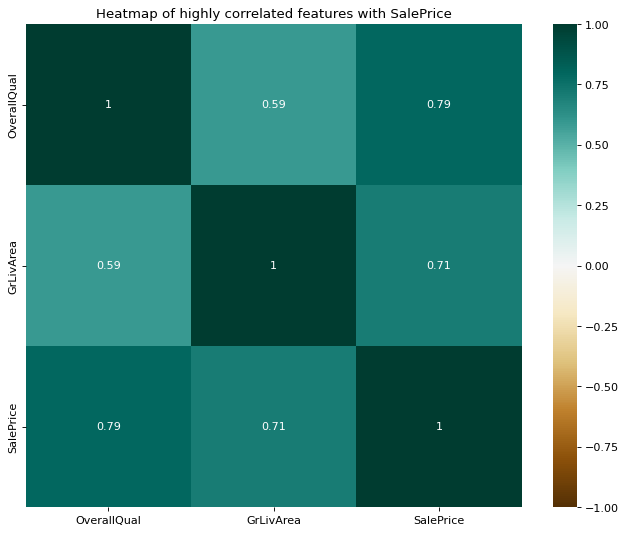

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
ax = plt.axes()
sns.heatmap(df_corr_hc.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
ax.set_title('Heatmap of highly correlated features with SalePrice')

Text(0.5, 1.0, 'Heatmap of mediumly correlated features with SalePrice')

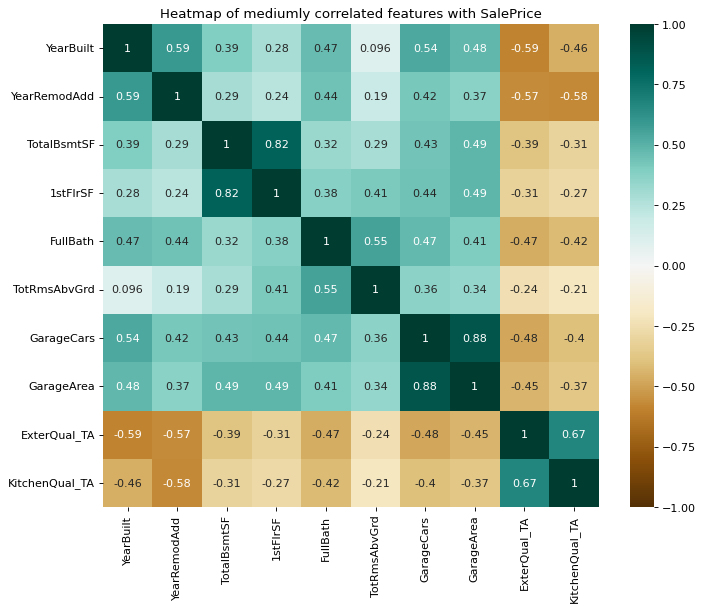

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
ax = plt.axes()
sns.heatmap(df_corr_mc.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
ax.set_title('Heatmap of mediumly correlated features with SalePrice')

Text(0.5, 1.0, 'Heatmap of low correlated features with SalePrice')

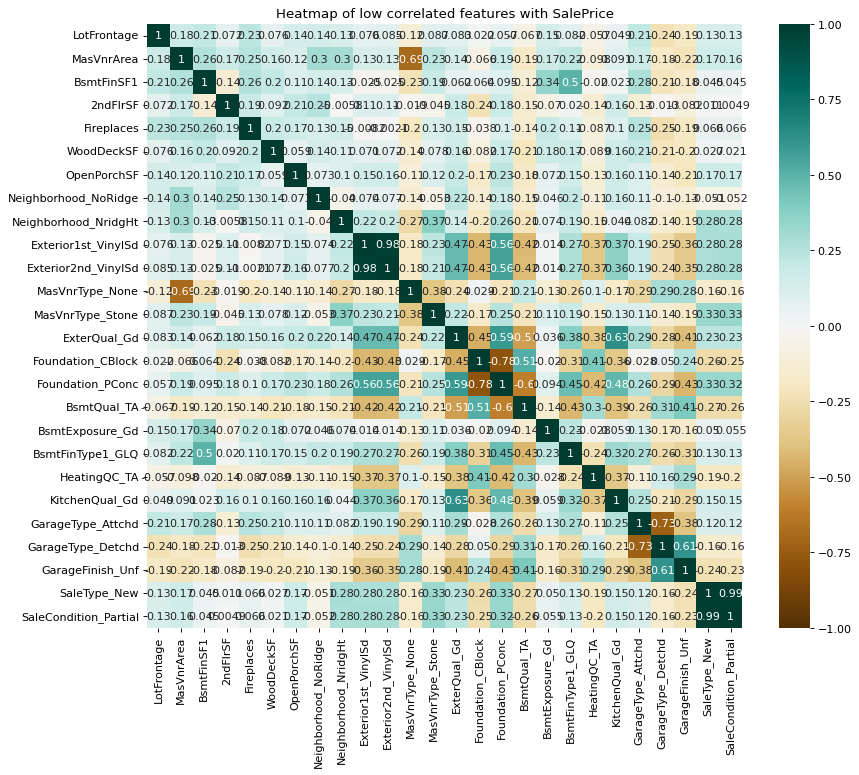

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
ax = plt.axes()
sns.heatmap(df_corr_lc.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
ax.set_title('Heatmap of low correlated features with SalePrice')

In [25]:
# Numerical features
# selecting numerical features
col_num = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
'2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath',
'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
'MoSold', 'YrSold']
df_train_num = df_train_dum[col_num]

### 2) Dealing with Categorical features

In [26]:
# Categorical features
# selecting Categorical features
df_train_cat = df_train_dum.drop(col_num, axis=1)
df_train_cat.columns

Index(['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LotShape_IR2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=210)

In [27]:
"""for i in df_train_cat.columns:
    figure(figsize=(10, 8), dpi=80)
    sns.set_theme(style="whitegrid")
    df_cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' % (i, len(df_cat_num)))
    ax = sns.barplot(x=df_cat_num.index, y=df_cat_num)
    ax.tick_params(axis='x', rotation=90)
    plt.show(ax)"""

'for i in df_train_cat.columns:\n    figure(figsize=(10, 8), dpi=80)\n    sns.set_theme(style="whitegrid")\n    df_cat_num = df_cat[i].value_counts()\n    print(\'Graph for %s: Total = %d\' % (i, len(df_cat_num)))\n    ax = sns.barplot(x=df_cat_num.index, y=df_cat_num)\n    ax.tick_params(axis=\'x\', rotation=90)\n    plt.show(ax)'

In [28]:
"""# Pivot tables of categorical features with respect to SalePrice
for i in df_train_cat.drop('SalePrice', axis=1).columns:
    print(pd.pivot_table(df_train_cat, index=i, values='SalePrice').sort_values(by='SalePrice'))"""

"# Pivot tables of categorical features with respect to SalePrice\nfor i in df_train_cat.drop('SalePrice', axis=1).columns:\n    print(pd.pivot_table(df_train_cat, index=i, values='SalePrice').sort_values(by='SalePrice'))"

<AxesSubplot:xlabel='OverallQual'>

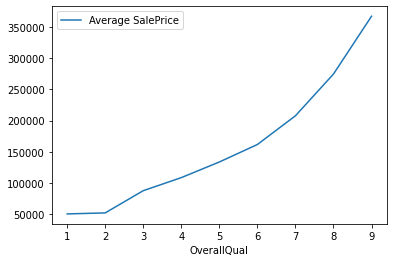

In [29]:
# Evolution of the average SalePrice with the OverallQual feature 
Avg_price_qual = []
for i in range(1,10):
    m = df_train_dum[df_train_dum['OverallQual']==i]["SalePrice"].mean()
    Avg_price_qual.append([i, m])
Avg_price_qual = pd.DataFrame(Avg_price_qual, columns=['OverallQual', 'Average SalePrice'])
Avg_price_qual.plot(x='OverallQual', y='Average SalePrice')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

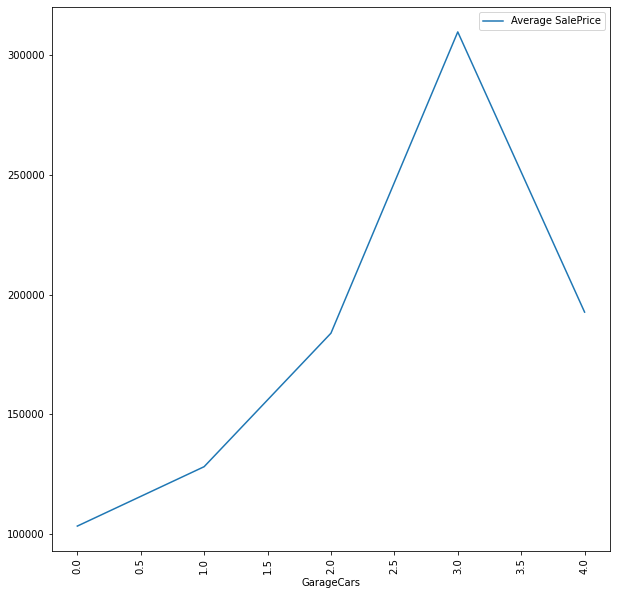

In [30]:
# Average SalePrice .vs. GarageCars
Avg_price_GarCars = []
for i in np.sort(df_train_dum['GarageCars'].unique()):
    m = df_train_dum[df_train_dum['GarageCars']== i]["SalePrice"].mean()
    Avg_price_GarCars.append([i, m])
Avg_price_GarCars = pd.DataFrame(Avg_price_GarCars, columns=['GarageCars', 'Average SalePrice'])
Avg_price_GarCars
Avg_price_GarCars.plot(x='GarageCars', y='Average SalePrice', figsize=(10,10))
plt.xticks(rotation=90)

In [31]:
corr_cat = []
col_cat = []
for i in df_train_cat.drop('SalePrice', axis=1).columns:
    corr_cat.append(df_train_cat[i].corr(df_train_cat['SalePrice']))
    col_cat.append(i)
df_cat_corr = pd.DataFrame({'Cat Feature':col_cat, 'Correlation': [abs(ele) for ele in corr_cat]})

In [32]:
df_cat_corr.sort_values(by='Correlation', ascending=True)

,Cat Feature,Correlation
147,BsmtFinType2_GLQ,0.000076
79,RoofMatl_Metal,0.000304
75,RoofStyle_Mansard,0.000308
190,GarageCond_Gd,0.000983
127,Foundation_Wood,0.002711
...,...,...
117,ExterQual_Gd,0.452466
124,Foundation_PConc,0.497734
168,KitchenQual_TA,0.519298
118,ExterQual_TA,0.589044


In [33]:
# Create DataFrames with categorical and numerical features of the test set
df_test_num = df_test_dum[col_num]
df_test_cat = df_test_dum.drop(col_num, axis=1)

In [34]:
# Levels of correlation of categorical features with SalePrice
# High correlation
col_cat_hc = df_cat_corr[df_cat_corr['Correlation'] >= 0.7]['Cat Feature']
# Moderate correlation
col_cat_mc = df_cat_corr[(df_cat_corr['Correlation'] >= 0.5) & 
                  (df_cat_corr['Correlation'] < 0.7)]['Cat Feature']
# Low correlation
col_cat_lc = df_cat_corr[(df_cat_corr['Correlation'] >= 0.3) & 
                  (df_cat_corr['Correlation'] < 0.5)]['Cat Feature']
# Negligeable correlation
col_cat_nc = df_cat_corr[(df_cat_corr['Correlation'] >= 0) & 
                  (df_cat_corr['Correlation'] < 0.3)]['Cat Feature']

In [35]:
# Cleaning categorical data
# Using pivot tables, selecting:
# categorcial features with one very highly predominant category
vhpred_cat_feat = ['Street', 'LandContour', 'Utilities', 'Condition2',
                 'RoofMatl', 'Heating', 'Functional']
# categorcial features with one highly predominant category
hpred_cat_feat = ['LandSlope', 'Condition1', 'BldgType', 'ExterCond',
                 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Electrical',
                 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature',
                 'SaleType']
# Keeping the categorical features with a correlation >= 0.3 and a very low variance < 1
# Droping the categorical features with a correlation < 0.3 and a very low variance < 1
# of the concatenated dataframe of df_train_cat and df_test_cat
df_less_cat = pd.concat((df_train_cat.drop('SalePrice', axis=1), df_test_cat))
col_less_cat = []
for i in df_cat_corr['Cat Feature']:
    if (i.split('_')[0] in vhpred_cat_feat) or (i.split('_')[0] in hpred_cat_feat):
        if float(df_cat_corr[df_cat_corr['Cat Feature']==i]['Correlation']) < 0.3:
            pass
        elif float(df_cat_corr[df_cat_corr['Cat Feature']==i]['Correlation']) >= 0.3:
            col_less_cat.append(i)

for i in df_less_cat.columns:
    if i in col_less_cat:
        pass
    else:
        if (i.split('_')[0] in vhpred_cat_feat) or (i.split('_')[0] in hpred_cat_feat):
            df_less_cat = df_less_cat.drop(columns=i, axis=1)
        else:
            pass
# Droping the categorical features where all the sub-features have a correlation < 0.2
for i in df_train_cat.columns:
    C = []
    col = []
    for j in df_less_cat.columns:
        if i == j.split('_')[0]:
            col.append(j)
            C.append(df_less_cat[j].corr(df_train_dum['SalePrice']))
    C = pd.DataFrame(C, columns=['Corr'])
    #print(C)
    if not C.empty:
        if ((C['Corr'] < 0.3).all()==True):
            df_less_cat = df_less_cat.drop(columns=col, axis=1)

In [36]:
df_less_cat.head()

,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,...,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,6,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,7,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


### 3) Dealing with numerical features 

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, '(4580.0, 5111.0)'),
  Text(0.0, 0, '(334.0, 865.0)'),
  Text(1.0, 0, '(865.0, 1396.0)'),
  Text(2.0, 0, '(1396.0, 1926.0)'),
  Text(3.0, 0, '(1926.0, 2457.0)'),
  Text(4.0, 0, '(2457.0, 2988.0)'),
  Text(5.0, 0, '(2988.0, 3519.0)'),
  Text(6.0, 0, '(3519.0, 4050.0)'),
  Text(7.0, 0, '(4050.0, 4580.0)'),
  Text(8.0, 0, '(4580.0, 5111.0)'),
  Text(9.0, 0, '')])

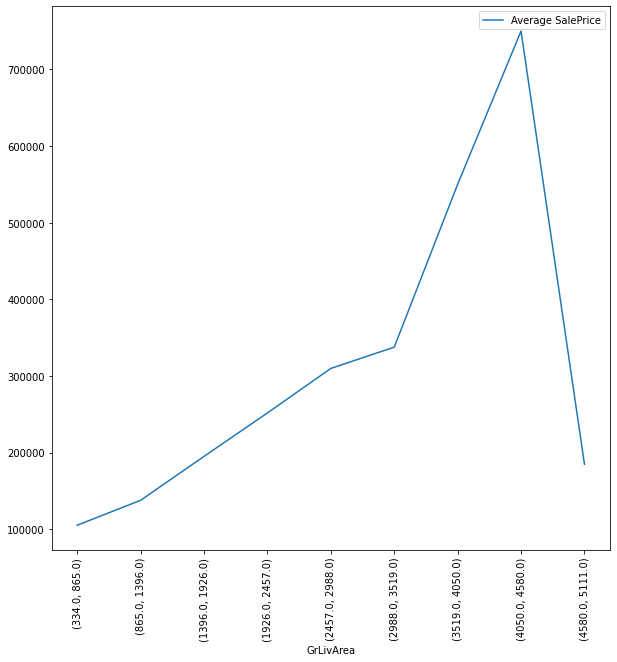

In [37]:
# Evolution of the average SalePrice with the GrLivArea
Avg_price_GrLivArea = []
min_Area = df_train_dum['GrLivArea'].unique().min()
max_Area = df_train_dum['GrLivArea'].unique().max()
width_Area = (max_Area-min_Area)/10
for i in range(1,10):
    mi = np.round((min_Area+width_Area*(i-1)))
    ma = np.round((min_Area+width_Area*i))
    m = df_train_dum[(df_train_dum['GrLivArea']>= mi) & (df_train_dum['GrLivArea']< ma)]["SalePrice"].mean()
    Avg_price_GrLivArea.append([(mi,ma), m])
Avg_price_GrLivArea = pd.DataFrame(Avg_price_GrLivArea, columns=['GrLivArea', 'Average SalePrice'])
Avg_price_GrLivArea
Avg_price_GrLivArea.plot(x='GrLivArea', y='Average SalePrice', figsize=(10,10))
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, '(0.0, 284.0)'),
  Text(0.5, 0, ''),
  Text(1.0, 0, '(284.0, 567.0)'),
  Text(1.5, 0, ''),
  Text(2.0, 0, '(567.0, 851.0)'),
  Text(2.5, 0, ''),
  Text(3.0, 0, '(851.0, 1134.0)'),
  Text(3.5, 0, '')])

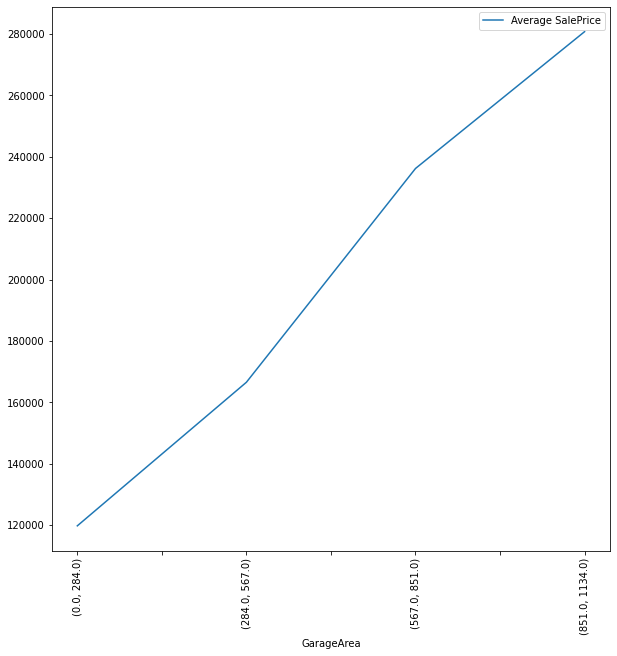

In [38]:
# Average SalePrice .vs. intervals of GarageArea
Avg_price_GrAr = []
min_Area = df_train_dum['GarageArea'].unique().min()
max_Area = df_train_dum['GarageArea'].unique().max()
width_Area = (max_Area-min_Area)/5
for i in range(1,5):
    mi = np.round((min_Area+width_Area*(i-1)))
    ma = np.round((min_Area+width_Area*i))
    m = df_train_dum[(df_train_dum['GarageArea']>= mi) & (df_train_dum['GarageArea']< ma)]["SalePrice"].mean()
    Avg_price_GrAr.append([(mi,ma), m])
Avg_price_GrAr = pd.DataFrame(Avg_price_GrAr, columns=['GarageArea', 'Average SalePrice'])
Avg_price_GrAr
Avg_price_GrAr.plot(x='GarageArea', y='Average SalePrice', figsize=(10,10))
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '(4888.0, 5499.0)'),
  Text(0.0, 0, '(0.0, 611.0)'),
  Text(1.0, 0, '(611.0, 1222.0)'),
  Text(2.0, 0, '(1222.0, 1833.0)'),
  Text(3.0, 0, '(1833.0, 2444.0)'),
  Text(4.0, 0, '(2444.0, 3055.0)'),
  Text(5.0, 0, '(3055.0, 3666.0)'),
  Text(6.0, 0, '(3666.0, 4277.0)')])

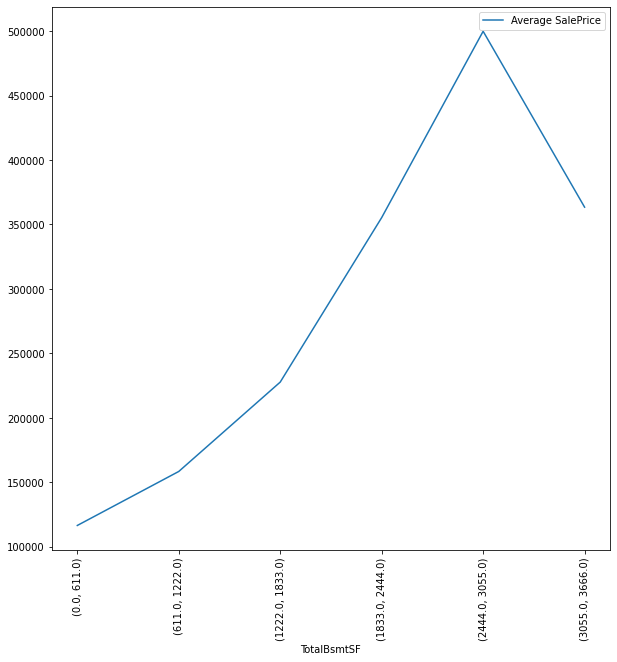

In [39]:
# Average SalePrice .vs. intervals of TotalBsmtSF
Avg_price_TBSF = []
min_Area = df_train_dum['TotalBsmtSF'].unique().min()
max_Area = df_train_dum['TotalBsmtSF'].unique().max()
width_Area = (max_Area-min_Area)/10
for i in range(1,10):
    mi = np.round((min_Area+width_Area*(i-1)))
    ma = np.round((min_Area+width_Area*i))
    m = df_train_dum[(df_train_dum['TotalBsmtSF']>= mi) & (df_train_dum['TotalBsmtSF']< ma)]["SalePrice"].mean()
    Avg_price_TBSF.append([(mi,ma), m])
Avg_price_TBSF = pd.DataFrame(Avg_price_TBSF, columns=['TotalBsmtSF', 'Average SalePrice'])
Avg_price_TBSF.plot(x='TotalBsmtSF', y='Average SalePrice', figsize=(10,10))
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '(3820.0, 4256.0)'),
  Text(0.0, 0, '(334.0, 770.0)'),
  Text(1.0, 0, '(770.0, 1206.0)'),
  Text(2.0, 0, '(1206.0, 1641.0)'),
  Text(3.0, 0, '(1641.0, 2077.0)'),
  Text(4.0, 0, '(2077.0, 2513.0)'),
  Text(5.0, 0, '(2513.0, 2949.0)'),
  Text(6.0, 0, '(2949.0, 3385.0)'),
  Text(7.0, 0, '(3385.0, 3820.0)')])

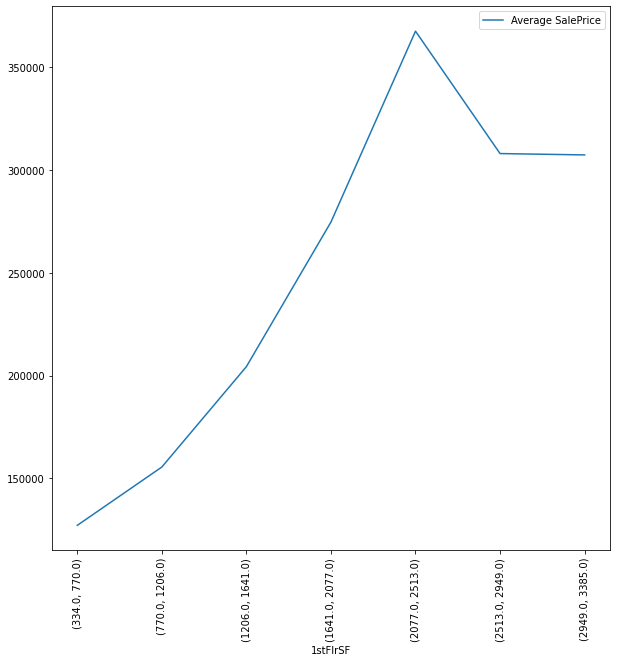

In [40]:
# Average SalePrice .vs. intervals of 1stFlrSF
Avg_price_1FSF = []
min_Area = df_train_dum['1stFlrSF'].unique().min()
max_Area = df_train_dum['1stFlrSF'].unique().max()
width_Area = (max_Area-min_Area)/10
for i in range(1,10):
    mi = np.round((min_Area+width_Area*(i-1)))
    ma = np.round((min_Area+width_Area*i))
    m = df_train_dum[(df_train_dum['1stFlrSF']>= mi) & (df_train_dum['1stFlrSF']< ma)]["SalePrice"].mean()
    Avg_price_1FSF.append([(mi,ma), m])
Avg_price_1FSF = pd.DataFrame(Avg_price_1FSF, columns=['1stFlrSF', 'Average SalePrice'])
Avg_price_1FSF.plot(x='1stFlrSF', y='Average SalePrice', figsize=(10,10))
plt.xticks(rotation=90)

In [41]:
# Calculating correlations between numerical features and SalePrice
corr_num = []
col_num = []
for i in df_train_num.columns:
    corr_num.append(df_train_num[i].corr(df_train_dum['SalePrice']))
    col_num.append(i)
df_corr_num = pd.DataFrame({'Num Feature':col_num, 'Correlation': [abs(ele) for ele in corr_num]})

In [42]:
# Removing features with negligeable correlation < 0.3 and a variance < 1
df_num_var = df_train_num.var()
df_num_var = df_num_var.to_frame()
df_num_var.reset_index(inplace=True)
df_num_var = df_num_var.rename(columns = {'index':'Num Feature', 0: 'Variance'})
df_num_var_corr = pd.concat([df_corr_num, df_num_var['Variance']], axis=1)
col_less_num = df_num_var_corr.loc[(df_num_var_corr['Variance'] > 1) & (df_num_var_corr['Correlation'] >= 0.3)]['Num Feature']
# Concatenate the numerical features of the train and test sets
df_num = pd.concat((df_train_num, df_test_num))
df_less_num = pd.DataFrame()
for i in df_num.columns:
    if i not in np.array(col_less_num):
        df_less_num.loc[:, i] = df_num[i]
    else:
        pass

In [43]:
df_less_num.head()

,LotArea,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,0.0,150.0,0,1.0,0.0,2,1,3,1,0,2003.0,2.0,0,0,0,0,0,2,2008
1,9600,0.0,284.0,0,0.0,1.0,2,0,3,1,1,1976.0,2.0,0,0,0,0,0,5,2007
2,11250,0.0,434.0,0,1.0,0.0,2,1,3,1,1,2001.0,2.0,0,0,0,0,0,9,2008
3,9550,0.0,540.0,0,1.0,0.0,1,0,3,1,1,1998.0,3.0,272,0,0,0,0,2,2006
4,14260,0.0,490.0,0,1.0,0.0,2,1,4,1,1,2000.0,3.0,0,0,0,0,0,12,2008


In [44]:
df_out = pd.concat([df_in['Id'], df_less_cat, df_less_num], axis=1)    
df_out.set_index = df_in['Id']
df_out.index.name = 'Id'

In [45]:
df_out

,Id,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,...,Fireplaces,GarageYrBlt,GarageCars,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
0,1,7,0,0,1,0,0,0,1,0,...,0,2003.0,2.0,0,0,0,0,0,2,2008
1,2,6,0,0,1,0,0,0,1,0,...,1,1976.0,2.0,0,0,0,0,0,5,2007
2,3,7,0,0,1,0,0,0,0,0,...,1,2001.0,2.0,0,0,0,0,0,9,2008
3,4,7,0,0,1,0,0,0,0,0,...,1,1998.0,3.0,272,0,0,0,0,2,2006
4,5,8,0,0,1,0,0,0,0,0,...,1,2000.0,3.0,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,0,0,0,1,0,0,1,0,...,0,0.0,0.0,0,0,0,0,0,6,2006
1455,2916,4,0,0,0,1,0,0,1,0,...,0,1970.0,1.0,0,0,0,0,0,4,2006
1456,2917,5,0,0,1,0,0,0,1,0,...,1,1960.0,2.0,0,0,0,0,0,9,2006


In [46]:
# Split again the train and test DataFrames
df_train = df_out.loc[df_out['Id'] < 1461]
df_test = df_out.loc[df_out['Id'] > 1460]

### 4) Model building 

In [47]:
df_train.isnull().sum().sum()

0

In [48]:
df_train.isna().sum().sum()

0

In [49]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
## 1) Train Test split
X = df_train
y = SalePrice_column

In [51]:
## 2) Scale the data using RobustScaler
scaler = RobustScaler()
scaler.fit(X)
df_train_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [52]:
## 2) Multiple Linear Regression
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

lm = LinearRegression()
lm.fit(X_train, y_train)
scores = cross_val_score(lm, X_train, y_train, cv=3)
scores.mean(), scores.std()

(0.7774036495881967, 0.006540508108748149)

In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score
cv = KFold(n_splits = 3, shuffle=True, random_state = 45) # Split your data to k Folds
r2 = make_scorer(r2_score) # r2_score is the R^2 (coefficient of determination) which used to evaluate the performance of linear Regression Model
# formula is R^2 = 1-SS(res)/SS(tot)
r2_val_score = cross_val_score(lm, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_lm = [r2_val_score.mean()]
score_lm

[0.7807171560783844]

In [54]:
## 3) Lasso Rregression
"""lm_L = Lasso(max_iter=5000)
scores_L = cross_val_score(lm_L, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
## Trying various values for alpha
alpha = []
scores_L = []
for i in range(100, 200):
    alpha.append(i)
    lm_L = Lasso(alpha=(i), tol = 1e-2, max_iter=5000)
    cr = cross_val_score(lm_L, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
    scores_L.append(cr.mean())
plt.plot(alpha, scores_L)
error = tuple(zip(alpha, scores_L))
df_err = pd.DataFrame(error, columns=['alpha', 'error'])
alpha_best = df_err[df_err.error == max(df_err.error)]['alpha']"""

"lm_L = Lasso(max_iter=5000)\nscores_L = cross_val_score(lm_L, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)\n## Trying various values for alpha\nalpha = []\nscores_L = []\nfor i in range(100, 200):\n    alpha.append(i)\n    lm_L = Lasso(alpha=(i), tol = 1e-2, max_iter=5000)\n    cr = cross_val_score(lm_L, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)\n    scores_L.append(cr.mean())\nplt.plot(alpha, scores_L)\nerror = tuple(zip(alpha, scores_L))\ndf_err = pd.DataFrame(error, columns=['alpha', 'error'])\nalpha_best = df_err[df_err.error == max(df_err.error)]['alpha']"

In [55]:
alpha_best = 163 # The best alpha given the previous commented part
lm_L = Lasso(alpha=float(alpha_best))      
lm_L.fit(X_train, y_train)
r2_val_score = cross_val_score(lm_L, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_lmL = [r2_val_score.mean()]
score_lmL

[0.8048826842380924]

In [56]:
# This part is commented to avoid a large run time
"""# 4) Random Forest
rf = RandomForestRegressor()
cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
# Tune the rf model using GridsearchCV
#parameters = {'n_estimators': range(10,200,20), 'criterion':('mae', 'mse'), 'max_features':('sqrt', 'log2')}
parameters = {'n_estimators': range(20,200,10)}
clf_rf = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
clf_rf.fit(X_train, y_train)
r2_val_score = cross_val_score(clf_rf.best_estimator_, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_rf = [r2_val_score.mean()]
score_rf"""

"# 4) Random Forest\nrf = RandomForestRegressor()\ncross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)\n# Tune the rf model using GridsearchCV\n#parameters = {'n_estimators': range(10,200,20), 'criterion':('mae', 'mse'), 'max_features':('sqrt', 'log2')}\nparameters = {'n_estimators': range(20,200,10)}\nclf_rf = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)\nclf_rf.fit(X_train, y_train)\nr2_val_score = cross_val_score(clf_rf.best_estimator_, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score\nscore_rf = [r2_val_score.mean()]\nscore_rf"

In [57]:
# The best estimator of clf_rf is with n_estimators=130
clf_rf = RandomForestRegressor(n_estimators=130)
clf_rf.fit(X_train, y_train)
r2_val_score = cross_val_score(clf_rf, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_rf = [r2_val_score.mean()]
score_rf

[0.7939412523608839]

In [58]:
"""## 5) Gradient Boosting Tree
GB = GradientBoostingRegressor()
cross_val_score(GB, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

R = np.arange(0.01, 1, 0.05)
parameters = {'learning_rate': R, 'n_estimators': range(100,250,10)}
clf_GB = GridSearchCV(GB, parameters, scoring='neg_mean_absolute_error', cv=3)
clf_GB.fit(X_train, y_train)
r2_val_score = cross_val_score(clf_GB.best_estimator_, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_GB = [r2_val_score.mean()]
score_GB"""

"## 5) Gradient Boosting Tree\nGB = GradientBoostingRegressor()\ncross_val_score(GB, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)\n\nR = np.arange(0.01, 1, 0.05)\nparameters = {'learning_rate': R, 'n_estimators': range(100,250,10)}\nclf_GB = GridSearchCV(GB, parameters, scoring='neg_mean_absolute_error', cv=3)\nclf_GB.fit(X_train, y_train)\nr2_val_score = cross_val_score(clf_GB.best_estimator_, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score\nscore_GB = [r2_val_score.mean()]\nscore_GB"

In [59]:
# The best estimator of clf_GB is with a learning rate of 0.060000000000000005 and n_estimators of 230
clf_GB = GradientBoostingRegressor(learning_rate=0.060000000000000005, n_estimators=230)
clf_GB.fit(X_train, y_train)
r2_val_score = cross_val_score(clf_GB, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_GB = [r2_val_score.mean()]
score_GB

[0.8143767439239378]

In [60]:
# 6) Bagging and Boosting
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
BR_reg = BaggingRegressor(n_estimators=1000, random_state=51)
r2_val_score = cross_val_score(BR_reg, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_BR = [r2_val_score.mean()]
score_BR

[0.7944885121286841]

In [61]:
GBR_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='squared_error', random_state=51)
r2_val_score = cross_val_score(GBR_reg, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
score_GBR = [r2_val_score.mean()]
score_GBR

[0.8079917815710039]

In [62]:
Best_score = max(score_lm, score_lmL, score_rf, score_GB, score_BR, score_GBR)
Best_score

[0.8143767439239378]

### 5) Testing the models

In [63]:
from sklearn.metrics import mean_absolute_error
lm.fit(X_train, y_train)
Ypred_lm = lm.predict(X_test)
lm_L.fit(X_train,y_train)
Ypred_lmL = lm_L.predict(X_test)
clf_rf.fit(X_train, y_train)
Ypred_rf = clf_rf.predict(X_test)
clf_GB.fit(X_train, y_train)
Ypred_GB = clf_GB.predict(X_test)
GBR_reg.fit(X_train, y_train)
Ypred_GBR = GBR_reg.predict(X_test)
mae_lm = mean_absolute_error(Ypred_lm, y_test)
mae_lmL = mean_absolute_error(Ypred_lmL, y_test)
mae_rf = mean_absolute_error(Ypred_rf, y_test)
mae_GB = mean_absolute_error(Ypred_GB, y_test)
mae_GBR = mean_absolute_error(Ypred_GBR, y_test)

Pred = np.concatenate((Ypred_lm.reshape(-1,1), Ypred_lmL.reshape(-1,1), Ypred_rf.reshape(-1,1), 
                 Ypred_GB.reshape(-1,1), Ypred_GBR.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1)
df_pred = pd.DataFrame(Pred, 
                       columns =('Pred_lm', 'Pred_lmL', 'Pred_rf', 'Pred_GB', 'Pred_GBR', 'Y_test'))

In [64]:
df_pred

,Pred_lm,Pred_lmL,Pred_rf,Pred_GB,Pred_GBR,Y_test
0,133191.617305,134747.732840,136482.307692,129233.769942,121819.297509,154500.0
1,338726.336832,325990.638431,290681.707692,316627.368507,304117.927682,325000.0
2,100888.568501,110603.924809,129609.900000,115066.923629,109888.366319,115000.0
3,198970.234264,177900.905964,151035.076923,147545.075275,150322.921027,159000.0
4,340242.667370,339614.036541,358510.269231,376575.532591,370833.094173,315500.0
...,...,...,...,...,...,...
287,114126.818540,103495.474081,106687.692308,116356.714523,138733.505969,89471.0
288,300608.431988,278315.644756,227086.238462,246185.717626,255502.652725,260000.0
289,200989.089630,216799.496013,207028.400000,209406.944085,206107.846747,189000.0
290,104831.311240,101950.638370,119574.807692,119881.023582,113796.686923,108000.0


### 6) Predictions on the test set

In [65]:
## 2) Predictions
Pred_test_lm = lm.predict(df_test)
Pred_test_lmL = lm_L.predict(df_test)
Pred_test_rf = clf_rf.predict(df_test)
Pred_test_GB = clf_GB.predict(df_test)
Ypred_GBR = GBR_reg.predict(df_test)

In [66]:
Pred_test = np.concatenate((Pred_test_lm.reshape(-1,1), Pred_test_lmL.reshape(-1,1), 
                            Pred_test_rf.reshape(-1,1), Pred_test_GB.reshape(-1,1)), axis=1)
df_pred_test = pd.DataFrame(Pred_test, 
                       columns =('Pred_test_lm', 'Pred_test_lmL', 'Pred_test_rf', 'Pred_test_GB'))
df_pred_test = df_pred_test.set_index(df_test['Id'])

In [67]:
df_pred_test

,Pred_test_lm,Pred_test_lmL,Pred_test_rf,Pred_test_GB
Id,,,,
1461,115725.110756,106514.754662,134577.484615,124905.450171
1462,141532.773970,146264.332084,158396.153846,152343.749055
1463,164637.744744,160453.771288,168960.769231,171120.242721
1464,185305.147174,184316.942805,189285.738462,186842.049731
1465,236775.260688,233912.129193,209752.100000,194440.178684
...,...,...,...,...
2915,71840.949205,78472.018444,94475.861538,85880.062601
2916,70058.442798,87909.831418,99761.538462,88736.982758
2917,146044.050908,150211.736737,159849.230769,160468.728071


In [68]:
df_pred_test['Pred_test_GB']

Id
1461    124905.450171
1462    152343.749055
1463    171120.242721
1464    186842.049731
1465    194440.178684
            ...      
2915     85880.062601
2916     88736.982758
2917    160468.728071
2918    117136.162916
2919    218459.633393
Name: Pred_test_GB, Length: 1459, dtype: float64

In [69]:
Pred_test_GB = pd.DataFrame(df_pred_test['Pred_test_GB'])

In [70]:
Pred_test_GB.columns = ['SalePrice']
Pred_test_GB

,SalePrice
Id,
1461,124905.450171
1462,152343.749055
1463,171120.242721
1464,186842.049731
1465,194440.178684
...,...
2915,85880.062601
2916,88736.982758
2917,160468.728071


In [71]:
Pred_test_GB.to_csv('Submission.csv')